In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from numpy.random import default_rng

### Data Preprocessing

In [2]:
df = pd.read_csv("linear_regression_dataset.csv")
print(df.shape)
df.head()

(2000, 16)


,Category_1,Category_2,Ordinal_1,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,B,X,Medium,0.728,4.68000,2.207,-1.5030,1.2380,-2.0940,2.3100,-4.9570,-0.0636,-2.02700,-1.189,3.9940,77.20
1,A,Y,Medium,1.187,0.08356,2.771,0.7560,-1.1410,0.9062,0.8450,1.0030,1.6670,-0.08386,-1.844,0.9526,58.78
2,B,Y,Low,-4.793,1.85400,1.027,-0.7573,1.8550,0.9785,1.6640,3.8950,-0.3480,-0.18810,-2.540,3.5760,50.00
3,B,Y,Medium,-1.512,-0.21910,1.634,-0.3198,0.5930,-0.4540,-0.1495,0.6763,-0.3958,0.70750,3.703,-3.3220,80.44
4,NaN,X,High,-0.776,2.61300,0.651,-4.3480,0.0322,0.5073,0.9014,0.2050,2.0000,-2.84600,-0.698,1.6150,47.75


In [3]:
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
count,1917.000000,1923.000000,1881.000000,1906.000000,1892.000000,1903.000000,1898.000000,1908.000000,1914.000000,1916.000000,1895.000000,1901.000000,2000.000000
mean,0.343145,0.356578,0.119760,0.184659,0.316897,0.081237,0.974342,0.762045,0.777979,0.252236,0.299347,0.745607,45.453025
std,2.544353,2.555801,1.697388,2.039606,1.436178,2.683698,0.918792,2.424669,1.084848,2.374187,2.794408,2.775212,49.283451
min,-8.060000,-8.690000,-4.883000,-7.113000,-4.370000,-9.010000,-2.348000,-8.200000,-3.320000,-7.594000,-9.110000,-8.260000,-134.400000
25%,-1.453000,-1.342000,-1.023000,-1.169750,-0.687500,-1.667000,0.370925,-0.843900,0.063992,-1.353000,-1.564250,-1.148000,11.845000
50%,0.345500,0.341800,0.107500,0.223200,0.316650,0.086850,0.981700,0.722850,0.797000,0.254350,0.318800,0.744600,46.640000
75%,1.998000,2.072000,1.191000,1.551500,1.302750,1.811500,1.601750,2.395250,1.500000,1.897250,2.149000,2.629000,78.212500
max,9.050000,8.960000,7.875000,7.470000,5.574000,8.664000,4.004000,8.625000,4.453000,7.510000,9.070000,11.150000,201.900000


In [4]:
df.dtypes

Category_1     object
Category_2     object
Ordinal_1      object
Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Feature_11    float64
Feature_12    float64
Target        float64
dtype: object

In [5]:
df.isna().sum()/len(df)*100

Category_1    5.80
Category_2    5.05
Ordinal_1     4.50
Feature_1     4.15
Feature_2     3.85
Feature_3     5.95
Feature_4     4.70
Feature_5     5.40
Feature_6     4.85
Feature_7     5.10
Feature_8     4.60
Feature_9     4.30
Feature_10    4.20
Feature_11    5.25
Feature_12    4.95
Target        0.00
dtype: float64

In [6]:
df.loc[:,'Category_1'].value_counts()

Category_1
B    668
A    616
C    600
Name: count, dtype: int64

In [7]:
df.loc[:,'Category_2'].value_counts()

Category_2
X    970
Y    929
Name: count, dtype: int64

In [8]:
df.loc[:,'Ordinal_1'].value_counts()

Ordinal_1
Low       768
Medium    735
High      407
Name: count, dtype: int64

In [9]:
def fn_trf(val,cat):
    if val==cat:
        return 1.0
    return 0

df['Category_1_A'] = df['Category_1'].apply(fn_trf,args='A')
df['Category_1_B'] = df['Category_1'].apply(fn_trf,args='B')
df['Category_1_C'] = df['Category_1'].apply(fn_trf,args='C')

df['Category_2_X'] = df['Category_2'].apply(fn_trf,args='X')
df['Category_2_Y'] = df['Category_2'].apply(fn_trf,args='Y')

In [10]:
def ordinal(val):
    if val=='Low':
        return 0
    if val=='Medium':
        return 1
    if val=='High':
        return 2
    
df['ordinal'] = df['Ordinal_1'].apply(ordinal)

In [11]:
df = df.drop(['Category_1', 'Category_2', 'Ordinal_1'], axis=1)

In [12]:
df.shape

(2000, 19)

In [13]:
df.mean()

Feature_1        0.343145
Feature_2        0.356578
Feature_3        0.119760
Feature_4        0.184659
Feature_5        0.316897
Feature_6        0.081237
Feature_7        0.974342
Feature_8        0.762045
Feature_9        0.777979
Feature_10       0.252236
Feature_11       0.299347
Feature_12       0.745607
Target          45.453025
Category_1_A     0.308000
Category_1_B     0.334000
Category_1_C     0.300000
Category_2_X     0.485000
Category_2_Y     0.464500
ordinal          0.810995
dtype: float64

In [14]:
df = df.fillna(df.mean())

In [15]:
def scale(val,minv,maxv):
    return (val-minv)/maxv
def minmax(df):
    n = df.shape[1]
    for col in df.columns:
        if col=='Target':
            continue
        minv = min(df.loc[:,col].tolist())
        maxv = max(df.loc[:,col].tolist())
        df[col] = df[col].apply(scale,args=(minv,maxv))
    return df

In [16]:
df = minmax(df)
df.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target,Category_1_A,Category_1_B,Category_1_C,Category_2_X,Category_2_Y,ordinal
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,0.928524,1.009663,0.635271,0.976929,0.840850,1.049312,0.829756,1.039078,0.920274,1.044772,1.037414,0.807678,45.453025,0.308000,0.334000,0.300000,0.4850,0.464500,0.405497
std,0.275245,0.279698,0.209027,0.266543,0.250600,0.302144,0.223537,0.274576,0.238324,0.309423,0.299893,0.242656,49.283451,0.461782,0.471758,0.458372,0.4999,0.498863,0.372042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-134.400000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,0.744116,0.827539,0.498603,0.803447,0.672452,0.859534,0.686732,0.861623,0.765526,0.845373,0.840959,0.649462,11.845000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,0.928524,1.009663,0.635271,0.976929,0.840850,1.049312,0.829756,1.039078,0.920274,1.044772,1.037414,0.807678,46.640000,0.000000,0.000000,0.000000,0.0000,0.000000,0.500000
75%,1.102072,1.191350,0.761302,1.152945,1.006100,1.234779,0.975649,1.215304,1.070065,1.256158,1.224476,0.970628,78.212500,1.000000,1.000000,1.000000,1.0000,1.000000,0.500000
max,1.890608,1.969866,1.620063,1.952209,1.783997,2.039935,1.586414,1.950725,1.745565,2.011185,2.004410,1.740807,201.900000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [17]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Target', 'Category_1_A', 'Category_1_B',
       'Category_1_C', 'Category_2_X', 'Category_2_Y', 'ordinal'],
      dtype='object')

In [18]:
cols = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Category_1_A', 'Category_1_B',
       'Category_1_C', 'Category_2_X', 'Category_2_Y', 'ordinal','Target']
df = df[cols]

In [19]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Category_1_A,Category_1_B,Category_1_C,Category_2_X,Category_2_Y,ordinal,Target
0,0.971050,1.492187,0.900317,0.751004,1.006100,0.798246,1.163337,0.376000,0.731282,0.741278,0.873319,1.099013,0.0,1.0,0.0,1.0,0.0,0.5,77.20
1,1.021768,0.979192,0.971937,1.053414,0.579297,1.144529,0.797453,1.067014,1.119919,1.000019,0.801103,0.826242,1.0,0.0,0.0,0.0,1.0,0.5,58.78
2,0.360994,1.176786,0.750476,0.850830,1.116792,1.152874,1.001998,1.402319,0.667415,0.986138,0.724366,1.061525,0.0,1.0,0.0,0.0,1.0,0.0,50.00
3,0.723536,0.945413,0.827556,0.909398,0.890384,0.987535,0.549076,1.029136,0.656681,1.105393,1.412679,0.442870,0.0,1.0,0.0,0.0,1.0,0.5,80.44
4,0.804862,1.261496,0.702730,0.370147,0.789774,1.098488,0.811538,0.974493,1.194700,0.632224,0.927453,0.885650,0.0,0.0,0.0,1.0,0.0,1.0,47.75


### Gradient Descent Implementation

In [20]:
df.shape

(2000, 19)

In [21]:
X = df.iloc[:,0:-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
y = y[:, np.newaxis]

In [22]:
ones = np.ones([len(X), 1])
X = np.hstack([ones, X])

In [23]:
def getCost(X, y, theta):
    m, n = X.shape
    temp1 = np.dot(X, theta)-y
    J = 1/(2*m) * np.sum(np.power(temp1, 2))
    return J 

In [24]:
alpha = 0.1
num_iters = 20000
theta = np.zeros([X.shape[1], 1])

In [25]:
def gradDescentMulti(X, y, theta, alpha, iteration):
    m, n = X.shape 
    J_hist = np.zeros([iteration, 1])
    for t in range(num_iters):
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        theta = theta - temp
        J_hist[t] = getCost(X, y, theta)
    return theta, J_hist

In [26]:
start = time.time()
theta, J_hist = gradDescentMulti(X, y, theta, alpha, num_iters)
end = time.time()
print("Time Taken:",round(end-start,2))

Time Taken: 17.05


In [27]:
theta

array([[185.39199349],
       [-84.00940116],
       [-49.8328836 ],
       [ 79.93059536],
       [ 72.29450984],
       [ 23.42450485],
       [-37.13228244],
       [ 24.39027767],
       [-47.5743955 ],
       [ 12.6456728 ],
       [-61.23633218],
       [  5.28515745],
       [-43.21695273],
       [-11.63039202],
       [ -7.02090335],
       [  5.34807041],
       [  5.61390723],
       [ -4.70696095],
       [  2.43571023]])

In [28]:
datapoint = np.array([[0.5]*19]).reshape(19, 1)
pred = np.dot(np.transpose(theta), datapoint)[0][0]
pred

35.19994770085704

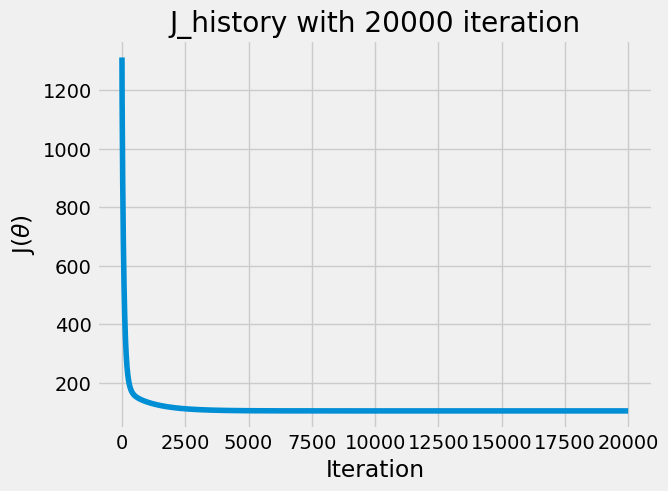

In [29]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with {} iteration".format(num_iters))
plt.show()

In [30]:
J_hist[-1]

array([104.14927925])

### Stochastic Gradient Decsent

In [31]:
def Stochastic_gradDescentMulti(X_original, y_original, theta, alpha, iteration,k=1):
    m, n = X_original.shape 
    J_hist = np.zeros([iteration, 1])
    
    for t in range(num_iters):
        rng = default_rng()
        indexes = rng.choice(len(X_original), size=k, replace=False)
        X = np.take(X_original, indexes,axis=0)
        y = np.take(y_original, indexes,axis=0)
        
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        theta = theta - temp
        J_hist[t] = getCost(X, y, theta)
    return theta, J_hist

In [32]:
alpha = 0.1
num_iters = 20000
theta = np.zeros([X.shape[1], 1])

In [33]:
start = time.time()
theta, J_hist = Stochastic_gradDescentMulti(X, y, theta, alpha, num_iters)
end = time.time()
print("Time Taken:",round(end-start,2))

Time Taken: 3.47


In [34]:
theta

array([[ 4.75313202],
       [-1.97656875],
       [ 1.03782387],
       [ 5.97022426],
       [ 9.23110674],
       [ 5.18076383],
       [ 1.47878292],
       [ 4.87617932],
       [ 1.14864464],
       [ 4.71764715],
       [-0.69109522],
       [ 5.46512205],
       [ 1.52420835],
       [-1.05094069],
       [ 1.63834123],
       [ 3.98181874],
       [ 4.21013671],
       [ 0.40623421],
       [ 2.04011597]])

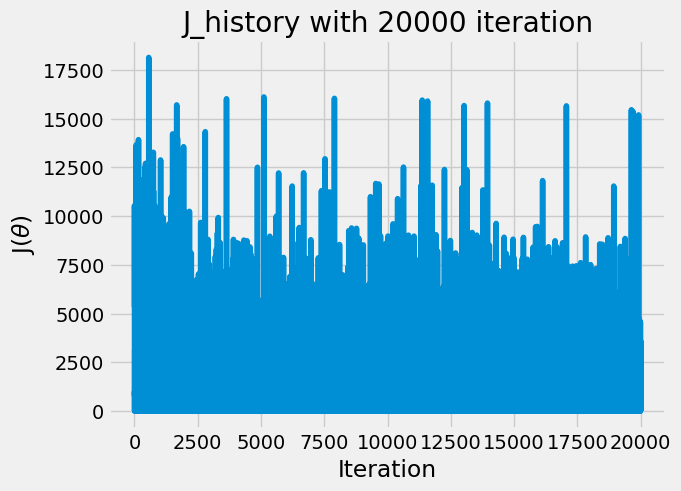

In [36]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with {} iteration".format(num_iters))
plt.show()

In [37]:
J_hist[-1]

array([247.12319364])

### Mini Batch Gradient Descent

#### k=32

In [38]:
def Batch_gradDescentMulti(X_original, y_original, theta, alpha, iteration,k=32):
    m, n = X_original.shape # m, number of dataset and n, number of features of X_norm
    J_hist = np.zeros([iteration, 1])
    
    for t in range(num_iters):
        rng = default_rng()
        indexes = rng.choice(len(X_original), size=k, replace=False)
#         print(indexes)
        X = np.take(X_original, indexes,axis=0)
        y = np.take(y_original, indexes,axis=0)
        
        temp = (np.dot(X, theta) - y)
        temp = np.dot(X.T, temp)
        temp = alpha/m * temp
        theta = theta - temp
        J_hist[t] = getCost(X, y, theta)
    return theta, J_hist

In [39]:
alpha = 0.1
num_iters = 20000
theta = np.zeros([X.shape[1], 1])

In [40]:
start = time.time()
theta, J_hist = Batch_gradDescentMulti(X, y, theta, alpha, num_iters)
end = time.time()
print("Time Taken:",round(end-start,2))

Time Taken: 3.56


In [41]:
theta

array([[ 35.94087317],
       [-65.87063509],
       [-32.26112097],
       [ 68.12453468],
       [ 76.21361569],
       [ 30.71939295],
       [-25.35406687],
       [ 32.55009665],
       [-30.3782668 ],
       [ 22.94919783],
       [-48.91127789],
       [ 16.89552291],
       [-22.33330879],
       [ -0.71582521],
       [  5.06507724],
       [ 17.69601715],
       [ 17.39054691],
       [  6.79559799],
       [  5.20262346]])

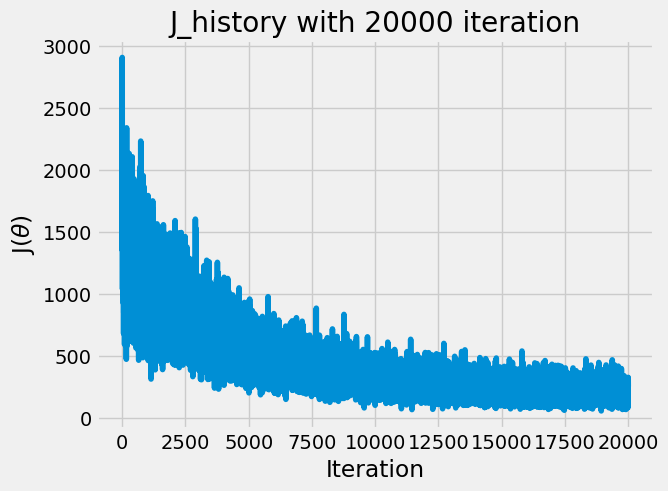

In [43]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with {} iteration".format(num_iters))
plt.show()

In [44]:
J_hist[-1]

array([257.20843932])

#### k=64

In [45]:
alpha = 0.1
num_iters = 20000
theta = np.zeros([X.shape[1], 1])

In [46]:
start = time.time()
theta, J_hist = Batch_gradDescentMulti(X, y, theta, alpha, num_iters,64)
end = time.time()
print("Time Taken:",round(end-start,2))

Time Taken: 3.69


In [47]:
theta

array([[ 58.64190329],
       [-75.13470977],
       [-39.30985831],
       [ 83.02484825],
       [ 81.10817528],
       [ 32.34151737],
       [-28.92760464],
       [ 35.41591873],
       [-36.32933919],
       [ 22.73786591],
       [-54.38590974],
       [ 13.88846208],
       [-30.63894482],
       [ -0.15258205],
       [  4.95301077],
       [ 17.55441843],
       [ 18.83702203],
       [  8.35567553],
       [  4.33857232]])

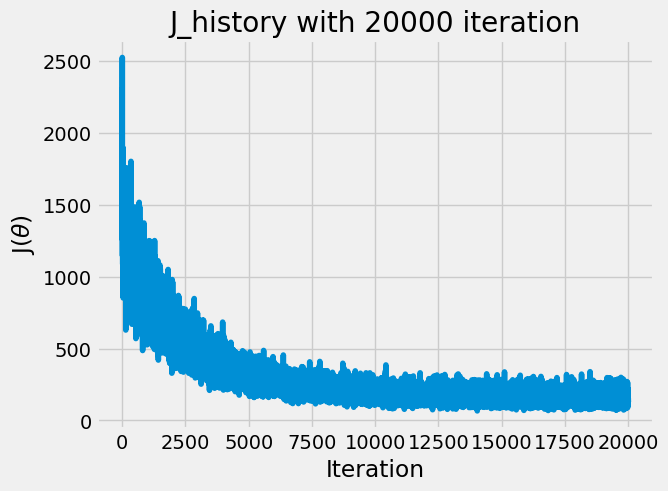

In [49]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with {} iteration".format(num_iters))
plt.show()

In [50]:
J_hist[-1]

array([128.30055512])

#### k = 128

In [51]:
alpha = 0.1
num_iters = 20000
theta = np.zeros([X.shape[1], 1])

In [52]:
start = time.time()
theta, J_hist = Batch_gradDescentMulti(X, y, theta, alpha, num_iters,128)
end = time.time()
print("Time Taken:",round(end-start,2))

Time Taken: 4.03


In [53]:
theta

array([[ 92.32076267],
       [-78.49366185],
       [-43.00406444],
       [ 85.68250599],
       [ 79.06580513],
       [ 29.90511013],
       [-31.37292459],
       [ 33.26385923],
       [-39.92479502],
       [ 19.90969019],
       [-56.67744984],
       [ 11.24681921],
       [-35.43352268],
       [ -2.16261243],
       [  2.77313151],
       [ 15.34248835],
       [ 16.38283177],
       [  5.96146521],
       [  3.7267026 ]])

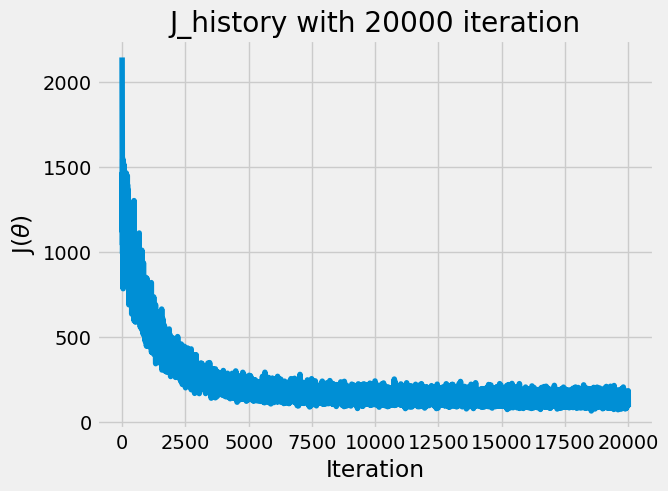

In [55]:
# Plot J history for multiple variables
plt.style.use('fivethirtyeight')

plt.plot(range(num_iters), J_hist)
plt.xlabel("Iteration")
plt.ylabel(r'J($\theta$)')
plt.title("J_history with {} iteration".format(num_iters))
plt.show()

In [56]:
J_hist[-1]

array([89.03840715])